<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Density-based Clustering

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Machine Learning in Python: a Hands-on Guide with Code, https://geostatsguy.github.io/MachineLearningDemos_Book. 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository (0.0.1). Zenodo. [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This is a tutorial for / demonstration of **Density-based Clustering**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Cluster Analysis](https://youtu.be/oFE10cLl0Fs?si=AwmYnrYggtYWGV2n)
* [Issues with k-Means Clustering](https://youtu.be/ysJw8M_J40I?si=EIlg2941QrfAt7zE)
* [Density-based Clustering](https://www.youtube.com/watch?v=3GaLe8HaDMc&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=15)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation for Density-based Cluster Analysis

We need to learn and segment distinct populations to improve our prediction models,

* mixing distinct populations to train prediction models often reduces model accuracy

* clustering is an inferential machine learning method to automate the segmentation of the dataset into separate groups, known as clusters and specified by an integer index

* common methods for cluster analysis like k-means clustering are easy to apply but are quite inflexible; therefore, it is essential to add more flexible clustering methods, like density-based clustering, to our toolkit

* always remember, the computer does not provide meaning nor description of the groups, that is our job!

Here's a simple workflow, demonstration of K-means, density- and spectral-based clustering (for automated category assignment) for subsurface modeling workflows. This should help you get started with inferential methods to find patterns in your subsurface data sets.  

#### k-Means Clustering

Let's recall K-means clustering, a common clustering approach for clustering, group assignment to unlabeled data, where dissimilarity within clustered groups is mini minimized. The loss function that is minimized is,

$$ 
J = \sum^k_{i=1} \sum_{\alpha \in C_i} || X_{\alpha} - \mu_i ||
$$

where $i$ is the cluster index, $\alpha$ is the data sample index, $X$ is the data sample and $\mu_i$ is the $i$ cluster prototype, $k$ is the total number of clusters, and $|| X_m - \mu_m ||$ is the Euclidean distance from a sample to the cluster prototype in $M$ dimensional space calculated as,

$$
|| X_{m,\alpha} - \mu_i || =  \sqrt{ \sum_m^M \left( X_{m,\alpha} - \mu_{m,i} \right)^2 }
$$

Here is a summary of import aspects for k-means clustering:

* **Prototype Method** - represents the training data with number of synthetic cases in the features space. For K-means clustering we assign and iteratively update $K$ prototypes.

* **Iterative Solution** - the initial prototypes are assigned randomly in the feature space, the labels for each training sample are updated to the nearest prototype, then the prototypes are adjusted to the centroid of their assigned training data, repeat until there is no further update to the training data assignments.

* **Unsupervised Learning** - the training data are not labeled and are assigned $K$ labels based on their proximity to the prototypes in the feature space. The idea is that similar things, proximity in feature space, should belong to the same cluster group.  

* **Feature Weighting** - the procedure depends on the Euclidian distance between training samples and prototypes in feature space. Distance is treated as the 'inverse' of similarity. If the features have significantly different magnitudes, the feature(s) with the largest magnitudes and ranges will dominate the loss function and cluster groups will become anisotropic aligned orthogonal to the high range feature(s). While the common approach is to standardize / normalize the variables, by-feature weighting may be applied through unequal variances. Note, in this demonstration we normalize the features to range from 0.0 to 1.0. 

#### Assumptions of k-means Clustering

These are the assumptions that result in significant reduction in flexibility of k-means clustering:

1. The clusters are spherical, convex, and isotropic within the predictor feature space.

 * This is due to the model loss based on minimizes difference within clusters, this is accomplished through this simple spherical geometry in the predictor feature space.

2. There is equal variance for all features

$$
\sigma_{X_1}^2 = \sigma_{X_2}^2= \ldots = \sigma_{X_m}^2
$$

* this assumed with the between sample distance / dissimilarity calculation

3. The clusters have similar sizes and frequency (number of samples in the clusters)

* larger cluster are divided to minimize the overall squared difference within clusters

* clusters with few samples in feature space are overwhelmed!

The limitations are quite significant, it is useful to have a more flexible method for clustering.

#### DBSCAN for Density-based Clustering

For dense, nonlinear, and potentially overlapping groups we can use a form of nature inspired computing for clustering. 

* did you know that your brain has built-in cluster analysis, based on density?

* I can prove this with a form of art know as pointillism.

<figure style="text-align: center;">
  <img src="_static/density_cluster/art.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> “The banks of the Marne at dawn.”, by Albert Dubois-Pillet (1886), an example of pointillism. I removed the color to highlight the automated cluster analysis in our brains based on changes in point density.
</figcaption>
</figure>

Did it work? You grouped the trees, the clouds, the vegetated river banks via local density. 

* the only reason I know about pointillism is because my sister Susan Weckesser was an incredible artist and musician. Rest in peace, Suse.

With density-based clustering the cluster groups are seeded or grown in feature space at locations with sufficient point density determined by hyperparameters,

<figure style="text-align: center;">
  <img src="_static/density_cluster/hyperparameters.png" style="display: block; margin: 0 auto; width: 30%;">
  <figcaption style="text-align: center;"> Density-based clustering hyperparameters require to check for sufficient local density to instantiate a cluster.
</figcaption>
</figure>

$\epsilon$ – the radius of the local neighbourhood in the metric of normalized features. The is the scale / resolution of the clusters. If this values is set too small, too many samples are left as outliers and if set too large, all the clusters merge to one single cluster.

$min_{Pts}$ – the minimum number of points to assign a core point, where core points are applied to initialize or grow a cluster group.

as you can see above, density is quantified by number of samples over a volume, where the volume is based on a radius over all dimensions of feature space.

Automated or guided $\epsilon$ parameter estimation is available by k-distance graph (in this case is k nearest neighbor),

<figure style="text-align: center;">
  <img src="_static/density_cluster/kdistance.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> k-distance graph with elbow about 0.07 distance in predictor feature space.
</figcaption>
</figure>

1. Calculate the nearest neighbor distance in normalized feature space for all the sample data (1,700 in this case).

2. Sort in ascending order and plot.

3. Select the distance that maximizes the positive curvature (the elbow).

Here is a summary of the important aspects for DBSCAN clustering,

* **DBSCAN** - stands for [Density-Based Spatial Clustering of Applications with Noise](https://cdn.aaai.org/KDD/1996/KDD96-037.pdf) (Ester et al.,1996).

* **Advantages** - include minimum domain knowledge to estimate hyperparameters, the ability to represent any arbitrary shape of cluster groups and efficient to apply for large data sets

* **Hierarchical Bottom-up / Agglomerative Clustering** – all data samples start as their own group, called ‘unvisited’ but practically as outliers until assigned to a group, and then the cluster group grow iteratively.

* **Mutually Exclusive** – like k-means clustering, all samples may only belong to a single cluster group. 

$$
P(C_i \cap C_j | i \ne j) = 0.0
$$

* **Non-exhaustive** – some samples may be left as unassigned and assumed as outliers for the cluster group assignment

$$
P(C_1 \cup C_2 \cup \dots C_k) \le 1.0 
$$

#### DBSCAN Iterative Solution

All data samples are initialized as unvisited and then the method proceeds through the dataset and assigns the samples as,

* **core** point if there are $\ge$ **min_samples** within **eps** distance from the sample, start of a new cluster

* **border** point if there are $lt$ **min_samples** within **eps** distance from the sample, but the sample is within **eps** distance of a core point, potential growth of an existing cluster

* **outlier** point if there are $lt$ **min_samples** within **eps** distance from the sample and the sample is not within **eps** distance of a core point

If you would like to see DBSCAN in action, check out my [DBSCAN interactive Python dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_DBSCAN.ipynb), 

<figure style="text-align: center;">
  <img src="_static/density_cluster/interactive_density.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> My interactive Python dashboard for DBSCAN.
</figcaption>
</figure>

Once the points are assigned these labels, all connected core points and their associate border points are assigned to an unique cluster.  Outlier points are left as outliers without an assigned cluster. To understand the cluster assignments we should explain the following forms of connection.

**directly density reachable** - point X is directly density reachable from A, if A is a core point and X belongs to the neighborhood (distance $le$ eps) from A.

**density-reachable** - point Y is density reachable from A if Y belongs to a neighborhood of a core point that can reached from A. This would require a chain of core points each belonging the previous core points and the last core point including point Y.

<figure style="text-align: center;">
  <img src="_static/density_cluster/densityreachable.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Directly density reachable and density reachable.
</figure>

**density-connected** - points A and B are density-connected if there is a point Z that is density-reachable from both points A and B.

<figure style="text-align: center;">
  <img src="_static/density_cluster/densityconnected.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Density connected.
</figure>

**density-based cluster** - a nonempty set where all points are density-connected to each other. 

<figure style="text-align: center;">
  <img src="_static/density_cluster/clusters.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Density-based clusters.
</figure>

Here's a concise summary of these steps for solving DBSCAN,

1. all points are labeled as unvisited

2. randomly visit an unvisited sample

3. check if a core point ($\ge min_{Pts}$ within $\epsilon$ distance), if so label as core otherwise label as outlier

4. now visit all points within eps distance of the core point, determine if core, otherwise label as border point

5. recursive operation where all points within eps distance of new core points are checked

6. once this is exhausted then randomly visit an unvisited point

This approach may be thought of as identify and grow/merge clusters guided by local point density.

#### Load the required libraries

The following code loads the required libraries. These should have been installed with Anaconda 3.

In [1]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import copy                                                   # for deep copies
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.colors import ListedColormap                  # custom color maps
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator,NullLocator) # control of axes ticks
import matplotlib.ticker as mtick                             # control tick label formatting
from sklearn.neighbors import NearestNeighbors                # nearest neighbours function to calculate eps hyperparameter
from sklearn.preprocessing import MinMaxScaler                # min/max normalization
from sklearn.cluster import KMeans                            # k-means clustering
from sklearn.cluster import DBSCAN                            # DBSCAN clustering
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map
seed = 42                                                     # random number seed 

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Convenience function to add major and minor gridlines to plots.

In [2]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks 

#### Custom Colormap

Custom colormap for DBSCAN for several groups and 0 set as an outlier.

In [3]:
paired = plt.get_cmap('Paired')                               # build on categorical colormap
paired_colors = paired(np.linspace(0, 1, paired.N))
paired_colors[0] = [1, 1, 1, 1]                               # white in RGBA format for first value
lcmap = ListedColormap(paired_colors)

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [4]:
#os.chdir("d:/PGE383")                                        # set the working directory with the input data file

#### Loading Data
Let's load one of the provided multivariate, spatial datasets:

* you can select datasets 1-4 below.

These are diverse multivariate datasets with:

* facies (integers)
* porosity (fraction)
* permeability ($mD$)

Yes, cluster analysis is unsupervised, inferential machine learning and does not use labels. We have facies available so we can evaluate our cluster groups with respect to the facies assigned.

We load the selected dataset with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read_csv() has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* **Tip** - established Python packages like pandas have excellent documentation. They are an excellent first stop to learn new packages. I also find examples critical and this motivates all the workflow examples and codes in my courses!

also, the program has an output, a pandas DataFrame loaded from the data file. So we have to specficy the name / variable representing this new DataFrame object.

```python
df = pd.read_csv("nonlinear_facies_v1.csv")  
```

You can switch the dataset from $1, \ldots, 4$ to try out different clustering challenges.

```python
dataset = 2
```

 Warning some of these datasets examples are quite difficult for clustering! I made a variety for you to test your skills!

In [5]:
dataset = 2                                                   # select a dataset, 1 - 4
reduce_the_data = False; retain_fraction = 0.3                # reduce the number of samples to improve visualization and run time 
yname = 'Facies'                                              # available group label for checking

if dataset == 1:
    Xname = ['Por','Perm']; Xunit = ['%','mD']; Xlabel = ['Porosity','Brittleness'] 
    Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
    Xmin = [0.0,0.0]; Xmax = [25.0,1200.0]                    # set minimums and maximums for visualization 
    df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v1.csv') # load our data table   
elif dataset == 2:
    Xname = ['AI','Por']; Xunit = [r'$kg/m2*10^3$','%']; Xlabel = ['Acoustic Impedance','Porosity'] 
    Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
    Xmin = [0.0,0.0]; Xmax = [1200.0,30.0]                    # set minimums and maximums for visualization 
    df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v2.csv') # load our data table
elif dataset == 3:
    Xname = ['AI','Por']; Xunit = [r'$kg/m2*10^3$','%']; Xlabel = ['Acoustic Impedance','Porosity'] 
    Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
    Xmin = [0.0,0.0]; Xmax = [1200.0,30.0]                    # set minimums and maximums for visualization 
    df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v3.csv') # load our data table
elif dataset == 4:
    Xname = ['AI','Por']; Xunit = [r'$kg/m2*10^3$','%']; Xlabel = ['Acoustic Impedance','Porosity'] 
    Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
    Xmin = [0.0,0.0]; Xmax = [7000.0,30.0]                    # set minimums and maximums for visualization 
    df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_Gaussian_mixture_v1.csv') # load our data table

nXname = ['n' + feature for feature in Xname]                 # labels, units and ranges for normalized features
nXunit = ['norm[' + unit + ']' for unit in Xunit]
nXlabel = ['Normalized ' + feature for feature in Xlabel]
nXlabelunit = [nXlabel[0] + ' (' + nXunit[0] + ')',nXlabel[1] + ' (' + nXunit[1] + ')']
nXmin = [0.0,0.0]; nXmax = [1.0,1.0]    

if reduce_the_data == True:
    df = df.sample(frac=retain_fraction, random_state = 73073); df = df.reset_index() # extract a fraction of the data

df = df[Xname + [yname]]                                      # make a new DataFrame with only the features of interest
df.head()

,AI,Por,Facies
0,381.296221,8.980678,3
1,304.449932,10.135657,3
2,193.607906,16.150132,3
3,205.778123,13.696509,3
4,290.854794,13.132821,3


#### Summary Statistics and Histograms for the Tabular Data

The table includes porosity (fraction) and acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^3$) that we will work with in the demonstration below.

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [6]:
df.describe().transpose()                                     # DataFrame summary statistics

,count,mean,std,min,25%,50%,75%,max
AI,1800.0,625.522917,247.547997,10.0,518.076017,683.865824,783.315226,1200.0
Por,1800.0,17.122778,4.778704,0.0,14.663434,17.674606,20.361860,30.0
Facies,1800.0,1.666667,0.816723,1.0,1.000000,1.000000,2.000000,3.0


Let's also check the proportion of facies.

* once again, we will not use facies, but facies indicates the proportion of samples natural cluster in the dataset

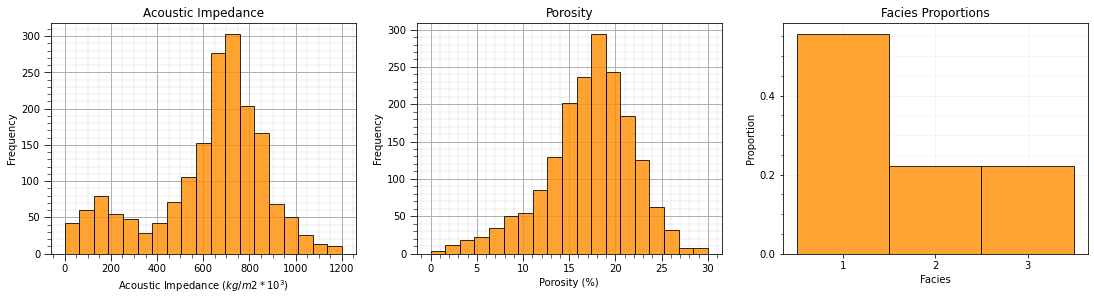

In [7]:
plt.subplot(131)                                              # histogram feature 1
plt.hist(df[Xname[0]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(Xmin[0],Xmax[0],20),density = False)
plt.title(Xlabel[0])
plt.xlabel(Xlabelunit[0]); plt.ylabel("Frequency")
add_grid()

plt.subplot(132)                                              # histogram feature 2
plt.hist(df[Xname[1]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(Xmin[1],Xmax[1],20),density = False)
plt.title(Xlabel[1])
plt.xlabel(Xlabelunit[1]); plt.ylabel("Frequency")
add_grid()

plt.subplot(133)                                              # histogram truth label
plt.hist(df[yname],alpha=0.8,color="darkorange",edgecolor="black",bins=[0.5,1.5,2.5,3.5],label = ['Shale','SandShale','Sand'],range=[0.5,2.5],density = True)
plt.title('Facies Proportions')
plt.xlabel('Facies'); plt.ylabel("Proportion")
ax = plt.gca()
ax.set_xticks(np.arange(1.0, 3.1, 1)); ax.set_yticks(np.arange(0, 0.6, 0.2)); ax.set_yticks(np.arange(0, 0.6, 0.05), minor=True)
ax.grid(which='minor', alpha=0.1); ax.grid(which='major', alpha=0.2)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.4, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Feature Normalization

The two considered features are quite incompatible. They have dramatically different:

* magnitudes / averages

* variances / ranges

Since the difference in ranges between the features is arbitrary we need to remove this by transforming each of the features. We normalize each of the features to range from 0.0 (minimum) to 1.0 (maximum).  

* Note, with normalization there is no distribution shape change so we would typically check for issues like outliers before the transformation, for brevity this step is not included here given there are no outliers in the provided datasets.

Now we use these normalized feature values for the clustering workflows, e.g., for calculating the required distances distance between samples and prototypes in our workflow:

* note, for each data sample we have original feature and transformed feature values; therefore, it is very easy to go back and forth without the need for backtransformation.

In [8]:
transform = MinMaxScaler();                                   # instantiate the normalization object
df['n' + Xname[0]], df['n' + Xname[1]] = transform.fit_transform(df.loc[:,Xname].values).T # normalize features
df.head(n = 3)

,AI,Por,Facies,nAI,nPor
0,381.296221,8.980678,3,0.312014,0.299356
1,304.449932,10.135657,3,0.247437,0.337855
2,193.607906,16.150132,3,0.154292,0.538338


Let's confirm that our normalized porosity and acoustic impedance now range between 0 and 1.

In [9]:
df.describe().transpose()                                     # check normalization via summary statistics

,count,mean,std,min,25%,50%,75%,max
AI,1800.0,625.522917,247.547997,10.0,518.076017,683.865824,783.315226,1200.0
Por,1800.0,17.122778,4.778704,0.0,14.663434,17.674606,20.361860,30.0
Facies,1800.0,1.666667,0.816723,1.0,1.000000,1.000000,2.000000,3.0
nAI,1800.0,0.517246,0.208024,0.0,0.426955,0.566274,0.649845,1.0
nPor,1800.0,0.570759,0.159290,0.0,0.488781,0.589154,0.678729,1.0


and let's compare the original and transformed histograms for the features.

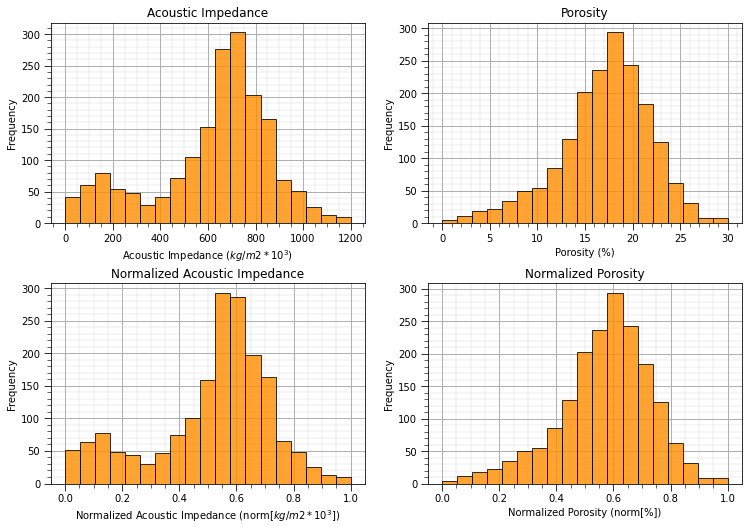

In [10]:
plt.subplot(221)                                              # original histograms
plt.hist(df[Xname[0]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(Xmin[0],Xmax[0],20),density = False)
plt.title(Xlabel[0])
plt.xlabel(Xlabelunit[0]); plt.ylabel("Frequency")
add_grid()

plt.subplot(222)
plt.hist(df[Xname[1]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(Xmin[1],Xmax[1],20),density = False)
plt.title(Xlabel[1])
plt.xlabel(Xlabelunit[1]); plt.ylabel("Frequency")
add_grid()

plt.subplot(223)                                              # normalized histograms
plt.hist(df[nXname[0]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(nXmin[0],nXmax[0],20),density = False)
plt.title(nXlabel[0])
plt.xlabel(nXlabelunit[0]); plt.ylabel("Frequency")
add_grid()

plt.subplot(224)
plt.hist(df[nXname[1]],alpha=0.8,color="darkorange",edgecolor="black",bins=np.linspace(nXmin[1],nXmax[1],20),density = False)
plt.title(nXlabel[1])
plt.xlabel(nXlabelunit[1]); plt.ylabel("Frequency")
add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.3); plt.show()

#### Quick Peek at Available Labels for Educational Purposes

I know this is cheating, but to calibrate our eye's and to check the natural clusters in our dataset, let's cheat and look at the features scatter plotted colored by the facies labels.
* for this demonstration workflow this is our inaccessible truth model, we are using this as only a teaching tool
* after this we will leave these labels out and attempt to automate their assignment with cluster analysis

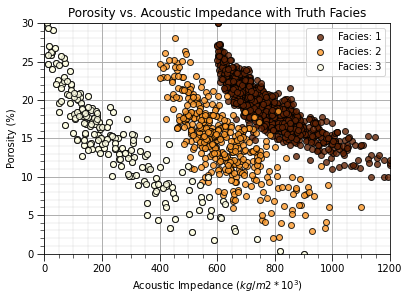

In [11]:
facies_list = np.unique(df[yname])                            # get the facies list from loaded data
min_facies = min(facies_list); max_facies = max(facies_list)
for ifacies in facies_list:                                   # plot the labeled data
    plt.scatter(df[df[yname] == ifacies][Xname[0]],df[df[yname] == ifacies][Xname[1]],
        color = plt.cm.YlOrBr_r((ifacies-min_facies)/(max_facies-min_facies)),edgecolor='black',alpha = 0.8,
        vmin = min_facies, vmax = max_facies,label = 'Facies: ' + str(ifacies))

plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); plt.title(Xlabel[1] + ' vs. ' + Xlabel[0] + ' with Truth ' + yname); add_grid()
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=0.8, wspace=0.2, hspace=0.2)

For just a moment, look at the truth model. Does it look like this will be difficult to reproduce and automate with cluster analysis? 

* are the natural groups separated - is there overlap?
* what is the shape of the cluster groups - are the groups spherical?
* what are the frequencies in each cluster group?

This is instructive, since if the groups are not well separated, not spherical and have uneven frequencies within each natural group, then k-means clustering will not likely perform well.

Now, let's ignore the truth facies categorical assignments and move forward with proper cluster analysis, unsupervised without labels.

#### Visualize the Unlabeled Data

In this exercise, we want to use clustering for automated assignment of facies based on two features. 

* I limit us two features for each of visualization
* Let's start by visualizing the unlabeled data
* We look at the data in original units and normalized units through this entire exercise.

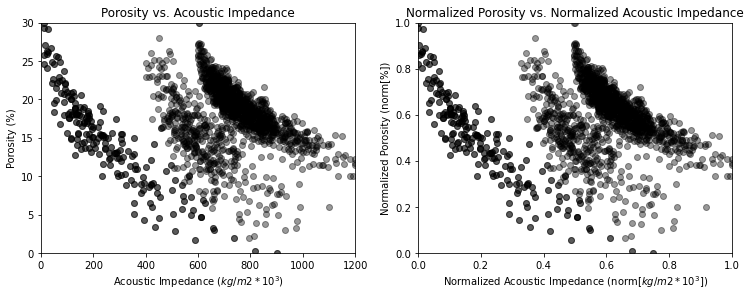

In [12]:
plt.subplot(121)                                              # scatter plot our data
plt.scatter(df[Xname[0]], df[Xname[1]], c="black", alpha = 0.4, linewidths=1.0, edgecolors="black")
plt.title(Xlabel[1] + ' vs. ' + Xlabel[0]); plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplot(122)                                              # scatter plot our normalized data 
plt.scatter(df[nXname[0]], df[nXname[1]],c="black",alpha = 0.4,linewidths=1.0, edgecolors="black")
plt.title(nXlabel[1] + ' vs. ' + nXlabel[0]); plt.xlabel(nXlabelunit[0]); plt.ylabel(nXlabelunit[1])
plt.xlim([nXmin[0],nXmax[0]]); plt.ylim([nXmin[1],nXmax[1]])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### k-Means Clustering

First we start with k-means clustering. From our previous analysis we may know that this will not go well!

* I have an entire demonstration dedicated to [k-means cluster](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Clustering.ipynb).

* Here we use k-means Clustering to compare and contrast with the subsequent density-based method that we will attempt.

Once again, let's be mindful of the assumptions of k-means clustering:

* spherical variability over the features
* same variability over each feature (after our min/max normalization)
* prior probability of membership in all clusters, equal number of samples in each

This dataset violates these assumptions with non-spherical shapes, unequal proportions of samples in each cluster (we know this because we have the truth facies and we did peak).

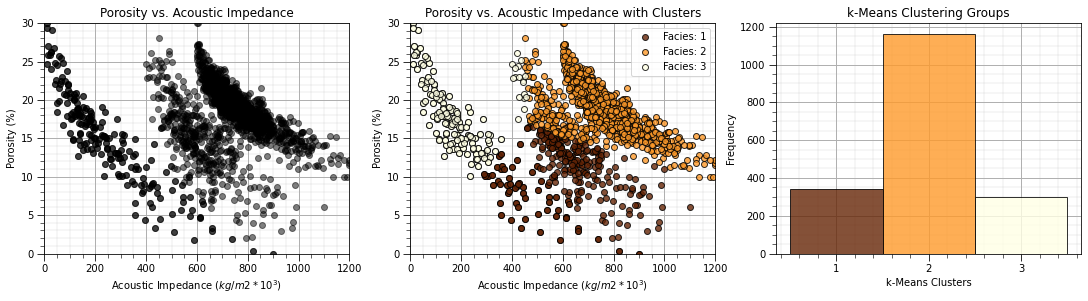

In [13]:
np.random.seed(seed)
K = 3                                                         # number of prototypes
ignore_warnings = True                                        # ignore warnings?

kmeans = KMeans(n_clusters=K, random_state=0).fit(df[nXname].values)
df['kMeans'] = kmeans.labels_ + 1
cluster_list = np.unique(df['kMeans']); min_cluster = min(cluster_list); max_cluster = max(cluster_list)

plt.subplot(131)                                              # plot the data unlabeled
plt.scatter(df[Xname[0]], df[Xname[1]],c='black',alpha=0.5,edgecolor='k',cmap = cmap)
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); plt.title(Xlabel[1] + ' vs. ' + Xlabel[0]); add_grid()
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplot(132)                                              # plot the cluster groups
for icluster in cluster_list:
    plt.scatter(df[df['kMeans'] == icluster][Xname[0]],df[df['kMeans'] == icluster][Xname[1]],
        color = plt.cm.YlOrBr_r((icluster-min_cluster)/(max_cluster-min_cluster)),edgecolor='black',alpha = 0.8,
        vmin = min_cluster,vmax = max_cluster,label = 'Facies: ' + str(icluster))
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); plt.title(Xlabel[1] + ' vs. ' + Xlabel[0] + ' with Clusters'); add_grid()
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])
plt.legend(loc='upper right')

plt.subplot(133)                                              # plot the cluster groups histograms       
N, bins, patches  = plt.hist(df['kMeans'],alpha=0.8,edgecolor="black",range=[min_cluster-0.5,max_cluster-0.5],
    bins=np.insert(np.linspace(min_cluster,max_cluster,len(cluster_list))+0.5,0,min_cluster-0.5),density = False)
for i in range(0,len(cluster_list)):
    patches[i].set_facecolor(plt.cm.YlOrBr_r((cluster_list[i]-min_cluster)/(max_cluster-min_cluster)));
ax = plt.gca(); ax.set_xticks(cluster_list); plt.xlabel('k-Means Clusters'); plt.ylabel('Frequency'); plt.title('k-Means Clustering Groups')
add_grid()   
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.4, top=0.8, wspace=0.2, hspace=0.2); plt.show()

As expected there are issues:

* the non-convex, nonlinear shapes, and low-density representation of edges of clusters are not captured well

As a results obvious connected geometries are broken up.

#### DBSCAN Clustering

The DBSCAN approach that seeds and grows clusters groups based on high density is well suited to working with data with an arbitrary (even non-convex) shape and with noise.

Once again the two parameters include:

* **eps** - maximum distance between to samples in features space for a sample to be included in the neighbourhood of the other sample. Too small a value will result in many clusters and outliers, and too large a value will result in one cluster with all the samples together.

* **min_samples** - minimum number of samples in a neighbourhood to spawn a new cluster. Use a larger value for noisy data to prevent identifying clusters due to a few grouped outliers.

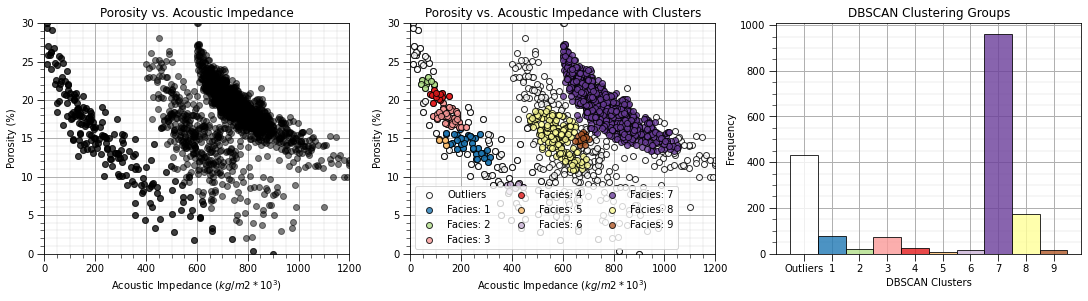

In [14]:
eps = 0.026; min_samples = 10                                 # DBSCAN model parameters

dbscan = DBSCAN(eps=0.029, min_samples=15).fit(df[nXname].values)
df['DBSCAN'] = dbscan.labels_ + 1
cluster_list = np.unique(df['DBSCAN']); min_cluster = min(cluster_list); max_cluster = max(cluster_list)

plt.subplot(131)                                              # plot the assigned training data and K prototypes
plt.scatter(df[Xname[0]], df[Xname[1]],c='black',alpha=0.5,edgecolor='k',cmap = cmap)
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); plt.title(Xlabel[1] + ' vs. ' + Xlabel[0]); add_grid()
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplot(132)                                              # plot the cluster groups
for icluster in cluster_list:
    if icluster == 0:
        plt.scatter(df[df['DBSCAN'] == icluster][Xname[0]],df[df['DBSCAN'] == icluster][Xname[1]],
            color = lcmap((icluster-min_cluster)/(max_cluster-min_cluster)),edgecolor='black',alpha = 0.8,
            vmin = min_cluster,vmax = max_cluster,label = 'Outliers')
    else:
        plt.scatter(df[df['DBSCAN'] == icluster][Xname[0]],df[df['DBSCAN'] == icluster][Xname[1]],
            color = lcmap((icluster-min_cluster)/(max_cluster-min_cluster)),edgecolor='black',alpha = 0.8,
            vmin = min_cluster,vmax = max_cluster,label = 'Facies: ' + str(icluster))
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); plt.title(Xlabel[1] + ' vs. ' + Xlabel[0] + ' with Clusters'); add_grid()
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])
plt.legend(loc='lower left',ncol = 3)

plt.subplot(133)                                              # plot the cluster histogram
N, bins, patches  = plt.hist(df['DBSCAN'],alpha=0.8,edgecolor="black",range=[min_cluster-0.5,max_cluster-0.5],
    bins=np.insert(np.linspace(min_cluster,max_cluster,len(cluster_list))+0.5,0,min_cluster-0.5),density = False)
for i in range(0,len(cluster_list)):
    patches[i].set_facecolor(lcmap((cluster_list[i]-min_cluster)/(max_cluster-min_cluster)));
ax = plt.gca(); ax.set_xticks(cluster_list); plt.xlabel('DBSCAN Clusters'); plt.ylabel('Frequency'); plt.title('DBSCAN Clustering Groups')
add_grid()   
current_labels = plt.gca().get_xticks().astype(str)
current_labels[0] = 'Outliers'
plt.gca().set_xticklabels(current_labels); plt.gca().xaxis.set_minor_locator(NullLocator())

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.4, top=0.8, wspace=0.2, hspace=0.2)

This result is very different than k-means clustering:

* the cluster groups are not symmetric or spherical
* we also have outliers

Let's explore the sensitivity in the parameters, by looking at the results over a $3 \times 3$ combinatorial of hyperparameters. Run this the first time as is and then try making changes the values in this code.

```python
eps_mat = [0.026,0.029,0.032] 
min_sample_mat = [10, 15, 20]
```

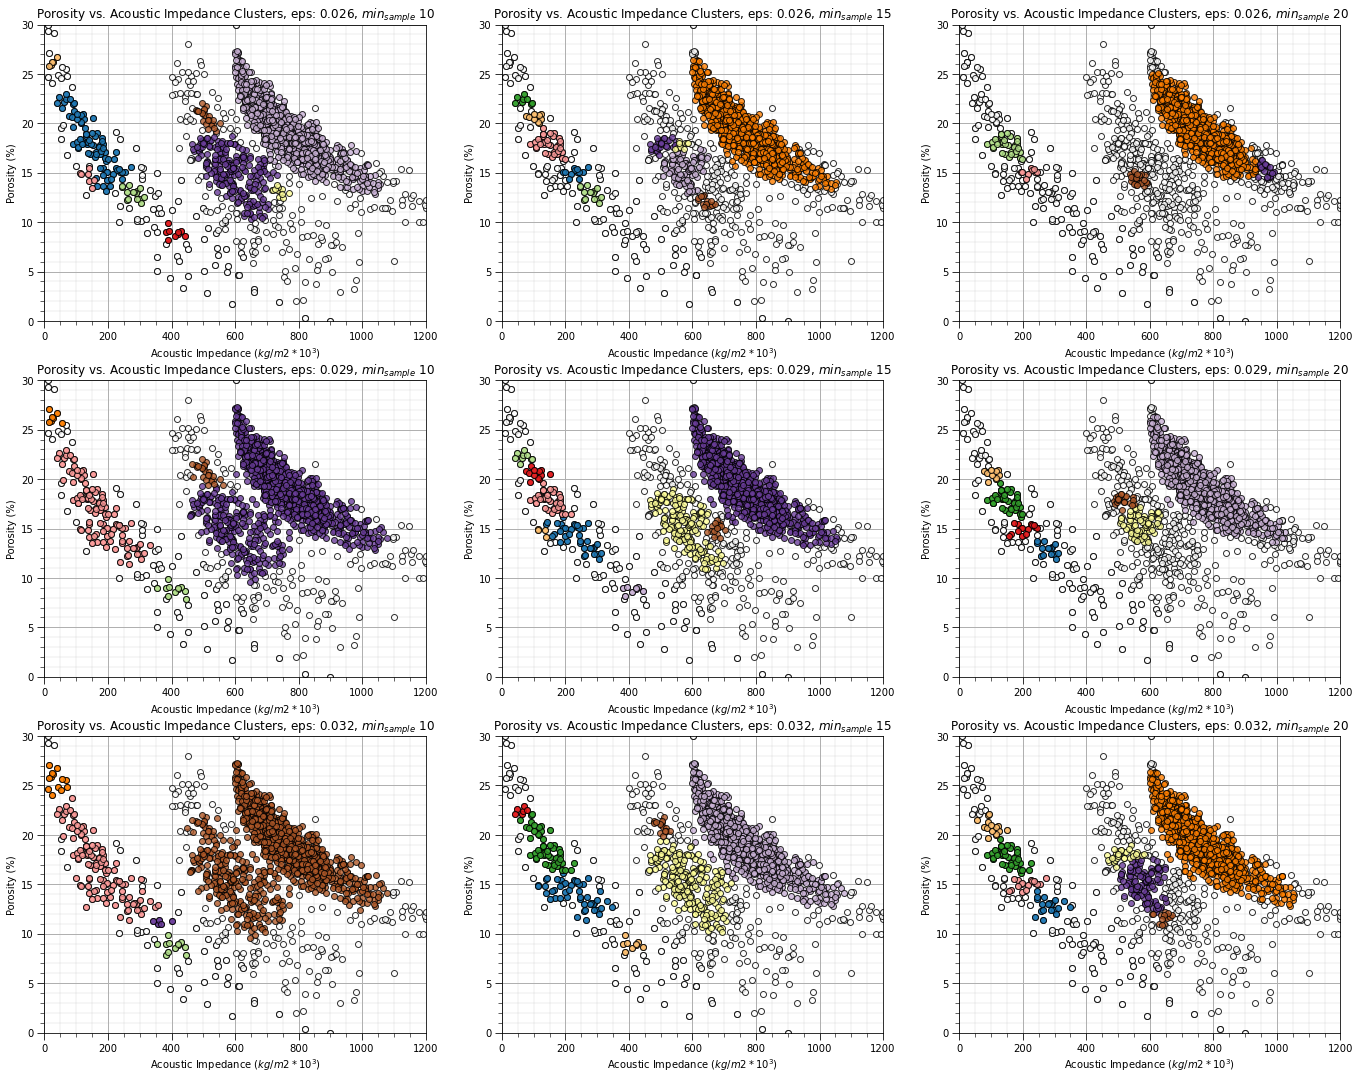

In [15]:
eps_mat = [0.026,0.029,0.032]                                 # set parameters to explore - set for 3 cases of each
min_sample_mat = [10, 15, 20]

index = 1
for eps in eps_mat:
    for min_sample in min_sample_mat:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample).fit(df[nXname].values) # perform DBSCAN
        df['DBSCAN'] = dbscan.labels_ + 1

        cluster_list = np.unique(df['DBSCAN']); min_cluster = min(cluster_list); max_cluster = max(cluster_list) # cluster indexes

        plt.subplot(3,3,index)                                # plot the cluster groups
        for icluster in cluster_list:
            if icluster == 0:
                plt.scatter(df[df['DBSCAN'] == icluster][Xname[0]],df[df['DBSCAN'] == icluster][Xname[1]],
                    color = lcmap((icluster-min_cluster)/(max_cluster-min_cluster)),edgecolor='black',alpha = 0.8,
                    vmin = min_cluster,vmax = max_cluster,label = 'Outliers')
            else:
                plt.scatter(df[df['DBSCAN'] == icluster][Xname[0]],df[df['DBSCAN'] == icluster][Xname[1]],
                    color = lcmap((icluster-min_cluster)/(max_cluster-min_cluster)),edgecolor='black',alpha = 0.8,
                    vmin = min_cluster,vmax = max_cluster,label = 'Facies: ' + str(icluster))
        plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
        plt.title(Xlabel[1] + ' vs. ' + Xlabel[0] + ' Clusters, eps: ' + str(eps) + r', $min_{sample}$ ' + str(min_sample))
        plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]]); add_grid()
        index = index + 1

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.50, wspace=0.2, hspace=0.2)

#### Calculating the DBSCAN Parameters

Now let's try to use a more repeatable method to calculate the DBSCAN hyperparameters.

* **min samples** - we set with expert knowledge, there is a rule of thumb, $min_{sample} \ge D + 1$ or $min_{sample} \ge 2 \times D + 1$ for large, noisy datasets 

* **eps** - we will use the nearest neighbour function to estimate it given the minimum number of samples

Let's calculate the nearest neighbour distance for each sample data to the min sample nearest neighbour in normalized feature space with the command:

```python 
neigh = NearestNeighbors(n_neighbors=min_sample)
nbrs = neigh.fit(df[['nPor','nPerm']].values)
distances, indices = nbrs.kneighbors(df[['nPor','nPerm']].values)
```

We have a $n \times k$ array with the distances and the sample data indices:

* for each $n$ sample we have a row of nearest neighbour distances up to k nearest neighbours (closest to furthest in the columns), note the first neighbour is sample itself; therefore the first column is 0.

* we will then sort the rows in ascending order and plot relative to the sample index, $i = 1,\ldots,n-1$

Then we will plot the distances vs. the sample index in the ascending order

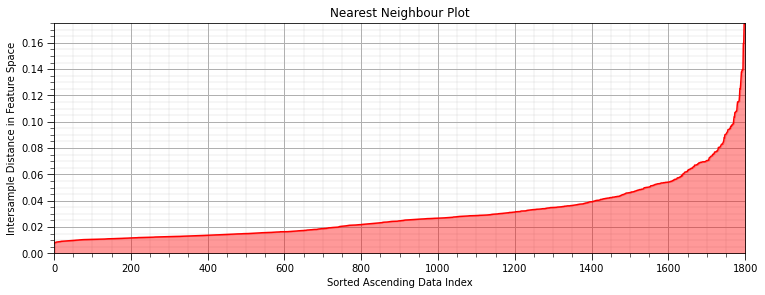

In [16]:
min_sample = 15                                               # set the number of neighbours for k-nearest neighbour plot

neigh = NearestNeighbors(n_neighbors=min_sample,radius=999.0,algorithm='kd_tree')
nbrs = neigh.fit(df[nXname].values)
distances, indices = nbrs.kneighbors(df[nXname].values)
distances = distances[:,min_sample-1]
distances = np.sort(distances)

plt.plot(distances, c = 'red'); plt.xlabel('Sorted Ascending Data Index'); plt.ylabel('Intersample Distance in Feature Space')
plt.fill_between(np.arange(1,len(df)+1,1),np.zeros((len(df))),distances,color='red',alpha=0.4)
plt.title('Nearest Neighbour Plot'); add_grid(); plt.xlim([0,len(df)]); plt.ylim([0,np.max(distances)])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=0.8, wspace=0.2, hspace=0.2)

Now we look for the nearest neighbour distance with the maximum positive curvature, known as the 'elbow' of the nearest neighbour plot 

* this provides an indication of the cluster sizes

* we would estimate eps as just above 0.03 - 0.04 in this case.   

Some observations from DBSCAN

* the results are quite sensitive to the selection of **eps** and **min_samples**.

* in the sparse part of the 'cluster' many of the data are assigned to other groups are remain as outliers

In this case, the result with this estimated eps hyperparameter is not satisfying. 

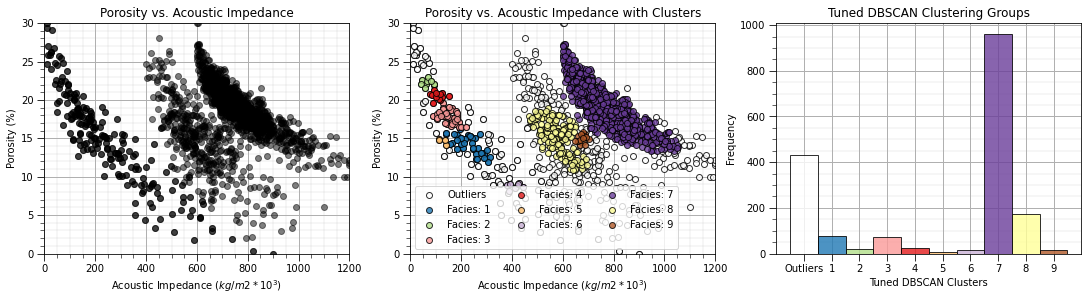

In [17]:
dbscan_tuned = DBSCAN(eps=0.029, min_samples=15).fit(df[nXname].values) # DBSCAN with tuned/improved parameters
df['DBSCAN_tuned'] = dbscan_tuned.labels_ + 1 
cluster_list = np.unique(df['DBSCAN_tuned']); min_cluster = min(cluster_list); max_cluster = max(cluster_list) # cluster statistics

plt.subplot(131)                                              # plot the assigned training data and K prototypes
plt.scatter(df[Xname[0]], df[Xname[1]],c='black',alpha=0.5,edgecolor='k',cmap = cmap)
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); plt.title(Xlabel[1] + ' vs. ' + Xlabel[0]); add_grid()
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplot(132)                                              # plot the cluster groups
for icluster in cluster_list:
    if icluster == 0:
        plt.scatter(df[df['DBSCAN_tuned'] == icluster][Xname[0]],df[df['DBSCAN_tuned'] == icluster][Xname[1]],
            color = lcmap((icluster-min_cluster)/(max_cluster-min_cluster)),edgecolor='black',alpha = 0.8,
            vmin = min_cluster,vmax = max_cluster,label = 'Outliers')
    else:
        plt.scatter(df[df['DBSCAN_tuned'] == icluster][Xname[0]],df[df['DBSCAN_tuned'] == icluster][Xname[1]],
            color = lcmap((icluster-min_cluster)/(max_cluster-min_cluster)),edgecolor='black',alpha = 0.8,
            vmin = min_cluster,vmax = max_cluster,label = 'Facies: ' + str(icluster))
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1]); plt.title(Xlabel[1] + ' vs. ' + Xlabel[0] + ' with Clusters'); add_grid()
plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])
plt.legend(loc='lower left',ncol = 3)

plt.subplot(133)                                              # plot cluster histogram
N, bins, patches  = plt.hist(df['DBSCAN_tuned'],alpha=0.8,edgecolor="black",range=[min_cluster-0.5,max_cluster-0.5],
    bins=np.insert(np.linspace(min_cluster,max_cluster,len(cluster_list))+0.5,0,min_cluster-0.5),density = False)
for i in range(0,len(cluster_list)):
    patches[i].set_facecolor(lcmap((cluster_list[i]-min_cluster)/(max_cluster-min_cluster)));
ax = plt.gca(); ax.set_xticks(cluster_list); plt.xlabel('Tuned DBSCAN Clusters'); plt.ylabel('Frequency'); plt.title('Tuned DBSCAN Clustering Groups')
add_grid()   
current_labels = plt.gca().get_xticks().astype(str)
current_labels[0] = 'Outliers'
plt.gca().set_xticklabels(current_labels); plt.gca().xaxis.set_minor_locator(NullLocator())

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.4, top=0.8, wspace=0.2, hspace=0.2)

#### Comments

This was a basic treatment of density-based clustering with DBSCAN. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
